### 01. Pytorch Exercises
https://www.learnpytorch.io/01_pytorch_workflow/#exercises

## Imports

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [24]:
# Check for device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 1. Create a straight line dataset using the linear regression formula (weight * X + bias).

* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

* Split the data into 80% training, 20% testing.

* Plot the training and testing data so it becomes visual.

In [25]:
weight = 0.3
bias = 0.9

# Range of values
start = 0
end = 10
step = 0.2

# X, y (feature & labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [26]:
len(X), len(y)

(50, 50)

In [27]:
# split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [28]:
# Plot prediction function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(8, 5))

  # Training data in color blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Test data in color green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  if predictions is not None:
    # Prediction in color red
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 10})

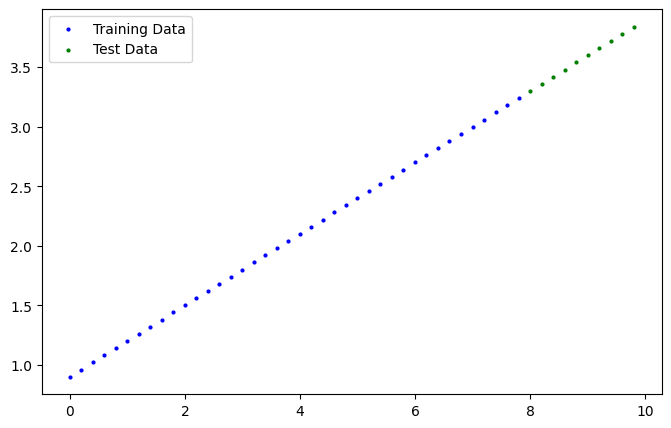

In [29]:
plot_predictions()

# 2. Build a PyTorch model by subclassing `nn.Module`.
* Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`

* Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.

* Once you've constructed the model, make an instance of it and check its `state_dict()`.

* Note: If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [30]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [31]:
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

# 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.

* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.

* Write a training loop to perform the appropriate training steps for 300 epochs.

* The training loop should test the model on the test dataset every 20 epochs.


In [32]:
# Put data on the target device

model.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

next(model.parameters()).device

device(type='cuda', index=0)

In [33]:
epochs = 300
learning_rate = 0.01

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [34]:
torch.manual_seed(42)
for epoch in range(epochs):
  # Train the model
  model.train()

  # 1. Forward pass
  y_pred = model(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Perform Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  if epoch % 20 == 0:
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model(X_test)

      # 2. Calculate loss
      test_loss = loss_fn(test_pred, y_test)

    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.9252638220787048 | Test Loss: 0.8958520293235779
Epoch: 20 | Loss: 0.23643021285533905 | Test Loss: 0.3347792625427246
Epoch: 40 | Loss: 0.20195822417736053 | Test Loss: 0.27744075655937195
Epoch: 60 | Loss: 0.16762219369411469 | Test Loss: 0.24552205204963684
Epoch: 80 | Loss: 0.13315017521381378 | Test Loss: 0.1881834715604782
Epoch: 100 | Loss: 0.09870221465826035 | Test Loss: 0.13262462615966797
Epoch: 120 | Loss: 0.08822795003652573 | Test Loss: 0.02561509609222412
Epoch: 140 | Loss: 0.07662870734930038 | Test Loss: 0.06273455917835236
Epoch: 160 | Loss: 0.13527020812034607 | Test Loss: 0.012145734392106533
Epoch: 180 | Loss: 0.09499018639326096 | Test Loss: 0.10380375385284424
Epoch: 200 | Loss: 0.1221889778971672 | Test Loss: 0.06488337367773056
Epoch: 220 | Loss: 0.13022828102111816 | Test Loss: 0.05571315437555313
Epoch: 240 | Loss: 0.1335696578025818 | Test Loss: 0.05271337181329727
Epoch: 260 | Loss: 0.1335696578025818 | Test Loss: 0.05271337181329727
Epoc

# 4. Make predictions with the trained model on the test data.

* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [35]:
model.eval()
with torch.inference_mode():
  y_pred = model(X_test)
y_pred

tensor([[3.5736],
        [3.6405],
        [3.7073],
        [3.7741],
        [3.8410],
        [3.9078],
        [3.9746],
        [4.0415],
        [4.1083],
        [4.1751]], device='cuda:0')

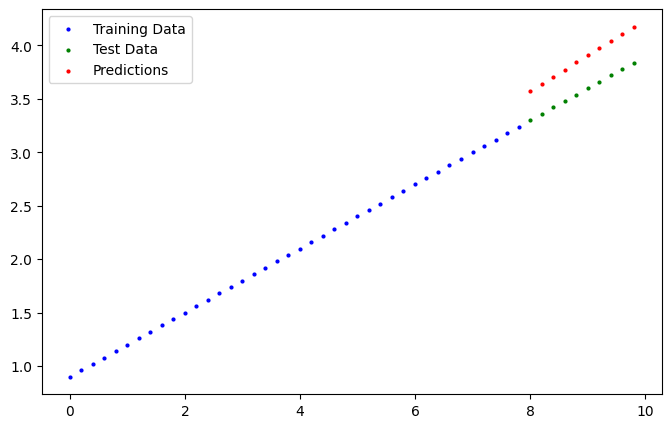

In [36]:
plot_predictions(predictions=y_pred.cpu())

# 5. Save your trained model's state_dict() to file.

* Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.

* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.


In [37]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_exercises.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_exercises.pth


In [38]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)

LinearRegressionModel()

In [41]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_pred = loaded_model(X_test)

y_pred == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

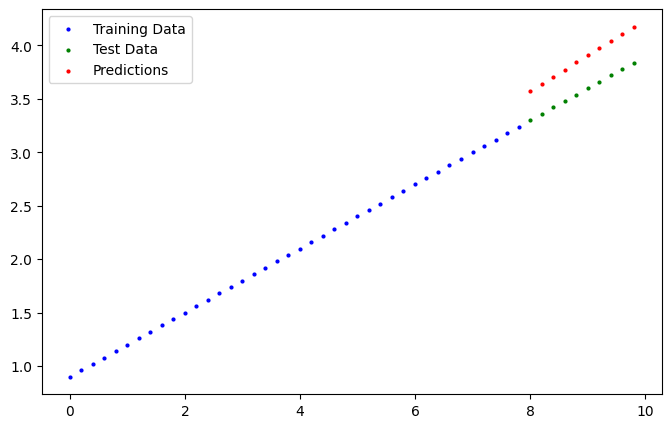

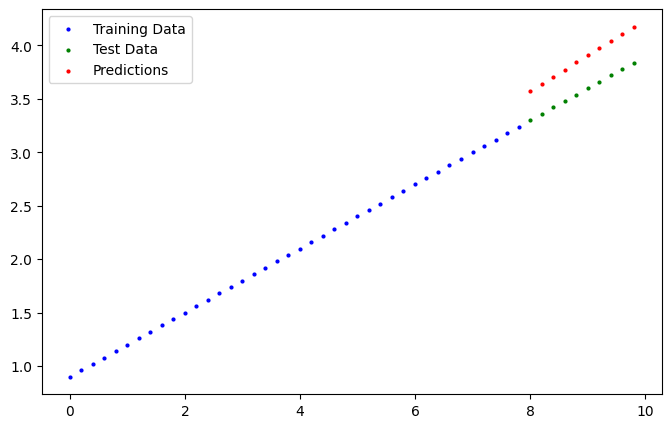

In [40]:
plot_predictions(predictions=loaded_model_pred.cpu())
plot_predictions(predictions=y_pred.cpu())